In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import gatemon
#from gatemon import *

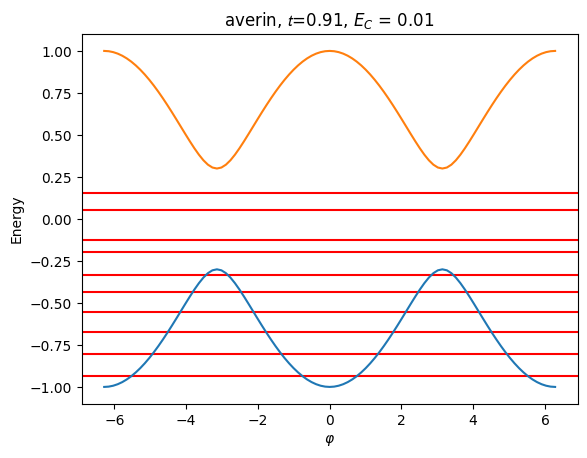

averin matrix element:  0.00027347337788097357


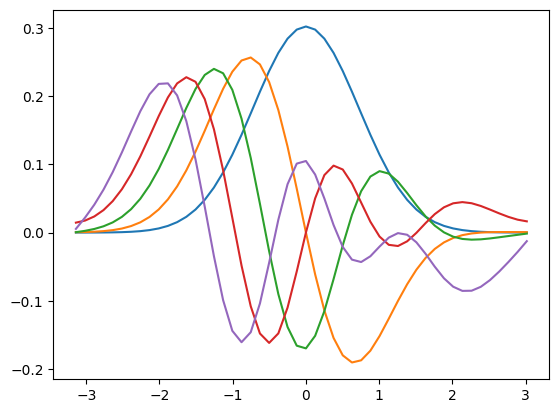

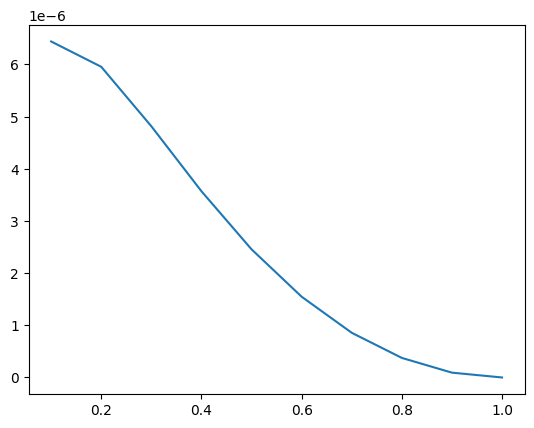

In [2]:
q = gatemon.Qubit(50, 0.01, 0.91, 0.5) #parameters (n, EC, t, ng)
q.model='averin'

q.spect()
q.plotspect(neigs=10, xmin=-2*np.pi, xmax=2*np.pi, pr=True)
eav=q.eigvals
print('averin matrix element: ', q.dH01())
q.plotwf(5)

a=[]
t=[]
for i in range(10):
    q.t=(i+1.)/10.
    t.append(q.t)
    a.append(abs(q.dH01())**2)
plt.plot(t,a)

In [3]:
ng_array = np.linspace(-2, 2, 80)

E0 = []
E1 = []
E2 = []
E3 = []

EC_const = 0.2

for i in range(len(ng_array)):
    q = gatemon.Qubit(100, EC_const, 0.1, ng_array[i]) #parameters (n, EC, t, ng)
    q.model='averin'
    q.eigsys()
    energies = q.getEigvals()

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])

In [4]:
q = gatemon.Qubit(100, EC_const, 0.1, 0.5) #parameters (n, EC, t, ng)
q.model='averin'
q.eigsys()
energies = q.getEigvals()
energy_scale = energies[1] - energies[0]

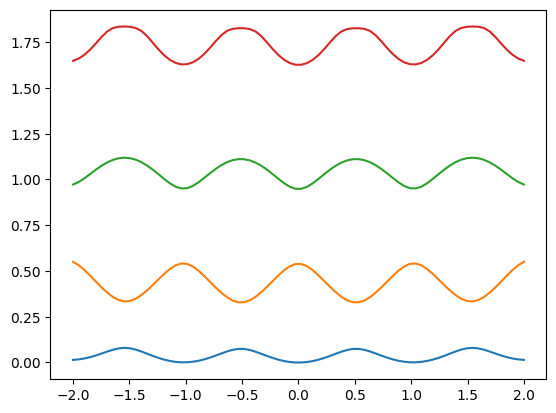

In [8]:
zero_point = np.amin(E0)

plt.plot(ng_array, E0-zero_point)
plt.plot(ng_array, E1-zero_point)
plt.plot(ng_array, E2-zero_point)
plt.plot(ng_array, E3-zero_point)
#plt.xlim(-1,1)
#plt.ylim(bottom=-1)